In [153]:
!pip install openpyxl xgboost shap

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Data Understanding

In [155]:
!curl -L -o FINAL_DATASET_with_Humidity_and_Station.xlsx "https://gitlab.com/JPratama7/wa-bot-be/-/raw/main/FINAL_DATASET_with_Humidity_and_Station.xlsx?ref_type=heads"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35995  100 35995    0     0   112k      0 --:--:-- --:--:-- --:--:--  112k


In [156]:
# Path ke file Excel
file_path = '/content/FINAL_DATASET_with_Humidity_and_Station.xlsx'

df = pd.read_excel(file_path)

In [157]:
df

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity
0,Cilacap,2013,1322,1255.75075,9.498871,Kacang Tanah,"Meteorologi, Cilacap",82.0
1,Banyumas,2013,1671,2172.471503,13.001026,Kacang Tanah,NaN,NaN
2,Purbalingga,2013,731,780.888185,10.682465,Kacang Tanah,NaN,NaN
3,Banjarnegara,2013,2278,1970.754694,8.65125,Kacang Tanah,NaN,NaN
4,Kebumen,2013,2202,1938.738197,8.804442,Kacang Tanah,"Sempor, Kebumen",84.0
...,...,...,...,...,...,...,...,...
732,Kota Surakarta,2022,27.00,156.00,57.78,Padi,NaN,NaN
733,Kota Salatiga,2022,650.00,3614.00,55.60,Padi,NaN,NaN
734,Kota Semarang,2022,3027.00,15691.00,51.84,Padi,NaN,NaN
735,Kota Pekalongan,2022,1351.00,7684.00,56.88,Padi,NaN,NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kabupaten      737 non-null    object 
 1   Tahun          737 non-null    int64  
 2   Luas Panen     737 non-null    object 
 3   Hasil Panen    737 non-null    object 
 4   Produktivitas  737 non-null    object 
 5   Tanaman        737 non-null    object 
 6   Station        256 non-null    object 
 7   Humidity       256 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 46.2+ KB


In [159]:
df = df.query("Tanaman == 'Kedelai'")

In [160]:
df

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity
36,Cilacap,2013,1555,2093.392,13.462328,Kedelai,"Meteorologi, Cilacap",82.0
37,Banyumas,2013,738,850.167,11.519878,Kedelai,NaN,NaN
38,Purbalingga,2013,129,204.291,15.836512,Kedelai,NaN,NaN
39,Banjarnegara,2013,277,319.155,11.521841,Kedelai,NaN,NaN
40,Kebumen,2013,3217,4539.329,14.110441,Kedelai,"Sempor, Kebumen",84.0
...,...,...,...,...,...,...,...,...
505,Kota Surakarta,2018,0,0,0,Kedelai,NaN,NaN
506,Kota Salatiga,2018,5,7,15.53,Kedelai,NaN,NaN
507,Kota Semarang,2018,0,0,0,Kedelai,NaN,NaN
508,Kota Pekalongan,2018,0,0,0,Kedelai,NaN,NaN


In [161]:
df['Kabupaten'] = df['Kabupaten'].str.replace('Kab. ', '')
df['Kabupaten'] = df['Kabupaten'].str.replace('Kabupaten ', '')

<ipython-input-161-a905a613c6e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kabupaten'] = df['Kabupaten'].str.replace('Kab. ', '')
<ipython-input-161-a905a613c6e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kabupaten'] = df['Kabupaten'].str.replace('Kabupaten ', '')


In [162]:
df[df['Kabupaten'].str.contains('Kota', case=False, na=False)]

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity
66,Kota Magelang,2013,0,0,0,Kedelai,NaN,NaN
67,Kota Surakarta,2013,0,0,0,Kedelai,NaN,NaN
68,Kota Salatiga,2013,0,0,0,Kedelai,NaN,NaN
69,Kota Semarang,2013,0,0,0,Kedelai,NaN,NaN
70,Kota Pekalongan,2013,0,0,0,Kedelai,NaN,NaN
71,Kota Tegal,2013,0,0,0,Kedelai,NaN,NaN
246,Kota Magelang,2014,0,0,0,Kedelai,NaN,NaN
247,Kota Surakarta,2014,0,0,0,Kedelai,NaN,NaN
248,Kota Salatiga,2014,0,0,0,Kedelai,NaN,NaN
249,Kota Semarang,2014,0,0,0,Kedelai,NaN,NaN


In [163]:
df[df['Kabupaten'].str.contains('Kabupaten', case=False, na=False)]

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity


In [164]:
df[df['Kabupaten'].str.contains('Kab. ', case=False, na=False)]

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity


In [165]:
df.drop(columns=['Station'], inplace=True)

<ipython-input-165-95b6067be5a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Station'], inplace=True)


In [166]:
df.isnull().sum()

Kabupaten         0
Tahun             0
Luas Panen        0
Hasil Panen       0
Produktivitas     0
Tanaman           0
Humidity         76
dtype: int64

In [167]:
df.isna().sum()

Kabupaten         0
Tahun             0
Luas Panen        0
Hasil Panen       0
Produktivitas     0
Tanaman           0
Humidity         76
dtype: int64

# 2. Pre-Processing Data

## 2.1 Mengubah Tipe Data Variabel Menjadi Integer

In [168]:
# Membuat function change data type
def clean_data(value):
    if not isinstance(value, str):
      if isinstance(value, int):
        return float(value)
      if isinstance(value, float):
        return value
      return np.nan
    if value == '-':
        return np.nan

    rb = value.split(",", 1)
    if len(rb) > 1:
        value = rb[0] + "." + rb[1]
    elif len(rb) == 1:
        value = rb[0]
    return float(value.replace(',', '.').replace(' ', '').strip())

In [169]:
df['Luas Panen'] = df['Luas Panen'].apply(clean_data)
df['Hasil Panen'] = df['Hasil Panen'].apply(clean_data)
df['Produktivitas'] = df['Produktivitas'].apply(clean_data)

<ipython-input-169-1c2a5001d4df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Luas Panen'] = df['Luas Panen'].apply(clean_data)
<ipython-input-169-1c2a5001d4df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hasil Panen'] = df['Hasil Panen'].apply(clean_data)
<ipython-input-169-1c2a5001d4df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [170]:
df.head()

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Humidity
36,Cilacap,2013,1555.0,2093.392,13.462328,Kedelai,82.0
37,Banyumas,2013,738.0,850.167,11.519878,Kedelai,NaN
38,Purbalingga,2013,129.0,204.291,15.836512,Kedelai,NaN
39,Banjarnegara,2013,277.0,319.155,11.521841,Kedelai,NaN
40,Kebumen,2013,3217.0,4539.329,14.110441,Kedelai,84.0


## 2.2 Interpolate Data NaN

In [171]:
df.isna().sum()

Kabupaten         0
Tahun             0
Luas Panen        0
Hasil Panen       0
Produktivitas     0
Tanaman           0
Humidity         76
dtype: int64

In [172]:
df['Luas Panen'] = df['Luas Panen'].interpolate(method='spline', order=2)
df['Hasil Panen'] = df['Hasil Panen'].interpolate(method='spline', order=2)
df['Produktivitas'] = df['Produktivitas'].interpolate(method='spline', order=2)
df['Humidity'] = df['Humidity'].interpolate(method='spline', order=2)

<ipython-input-172-ae5dbdddba06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Luas Panen'] = df['Luas Panen'].interpolate(method='spline', order=2)
<ipython-input-172-ae5dbdddba06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hasil Panen'] = df['Hasil Panen'].interpolate(method='spline', order=2)
<ipython-input-172-ae5dbdddba06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [173]:
df.isna().sum()

Kabupaten        0
Tahun            0
Luas Panen       0
Hasil Panen      0
Produktivitas    0
Tanaman          0
Humidity         0
dtype: int64

## 2.3 Handling outlier

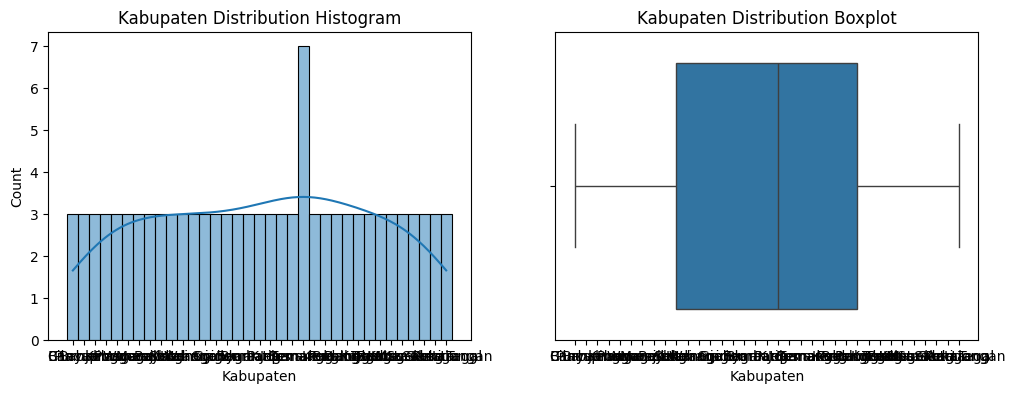

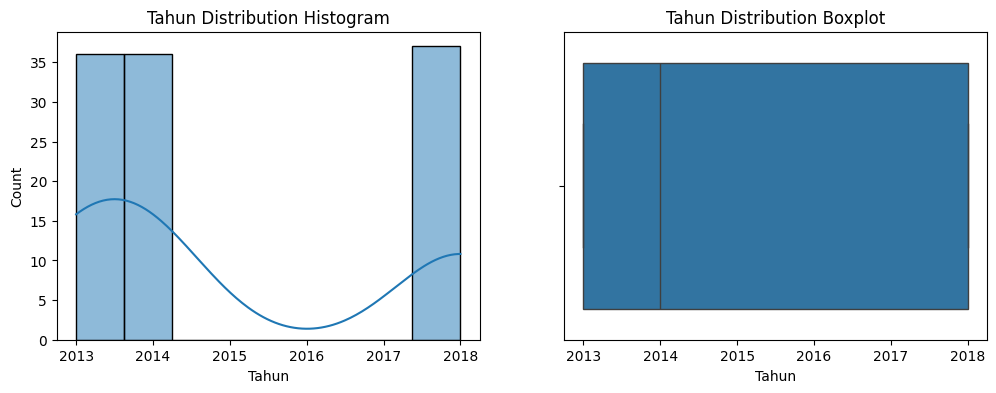

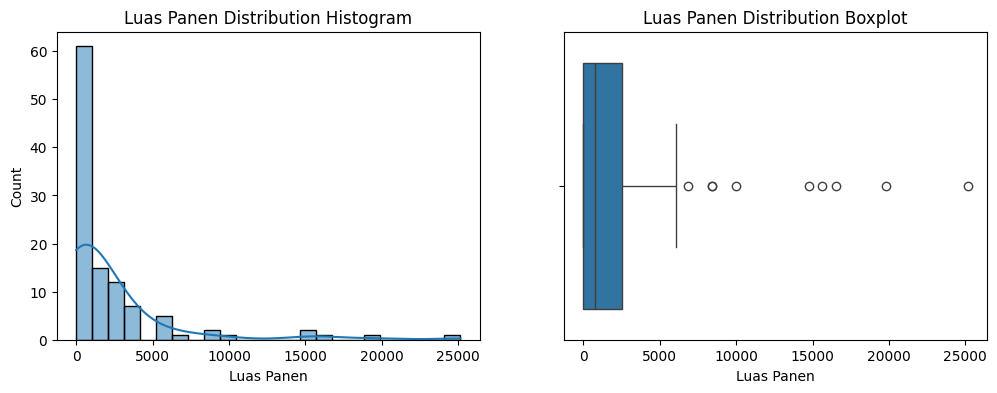

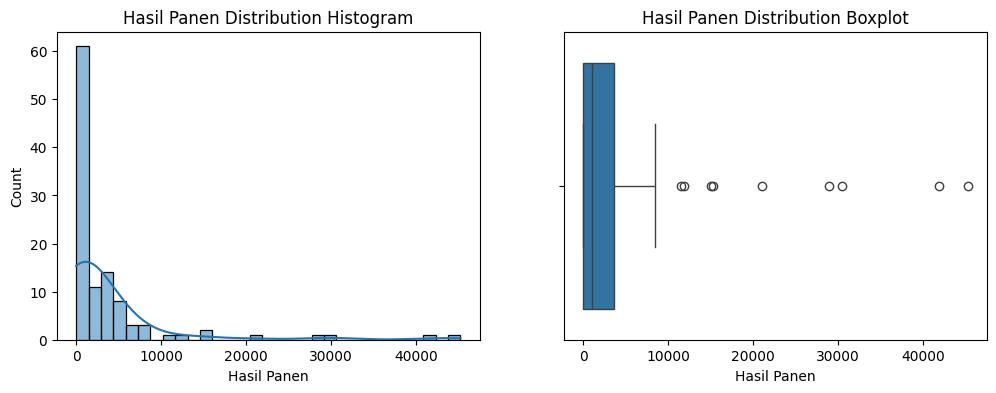

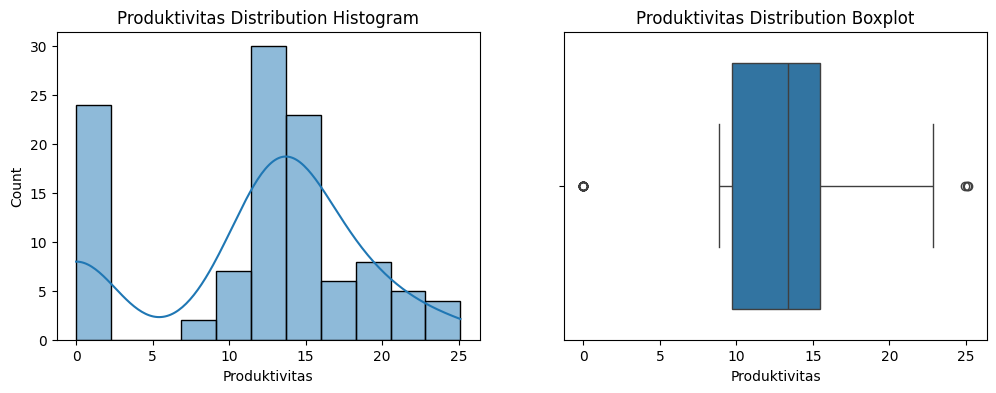

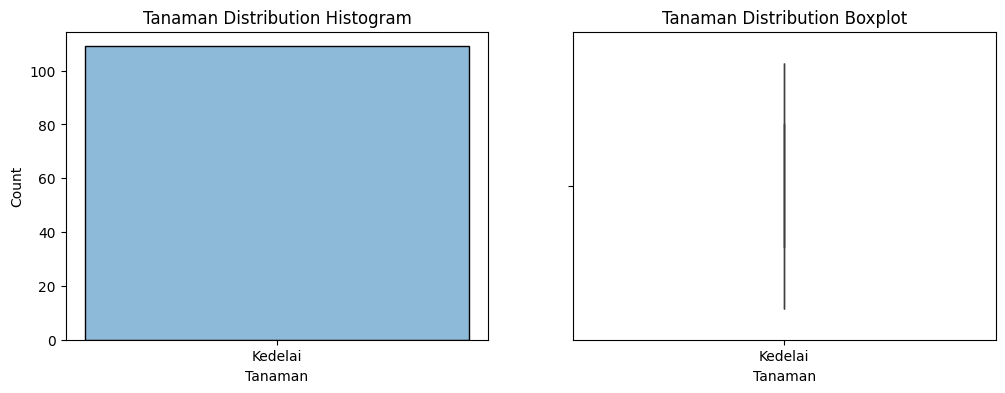

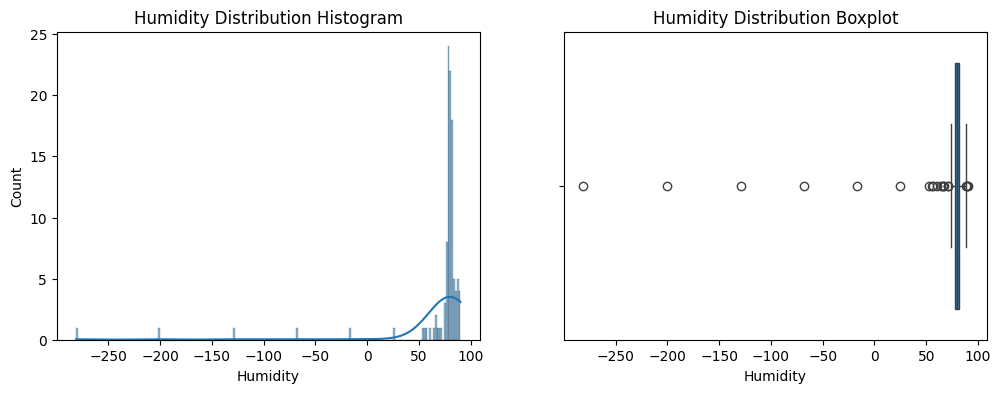

In [174]:
# Fungsi untuk menampilkan boxplot dan histogram
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()

df_var = df.columns
for var in df_var:
    num_dist(df, var)

In [175]:
# Variabel yang terdapat outlier
outlier_var = ['Humidity', 'Produktivitas', 'Hasil Panen', 'Luas Panen']
threshold = 0.01

# Menggunakan treatment Winsorize untuk menghapus Outlier
for var in outlier_var:
    df.loc[:, var] = winsorize(df[var], limits=[threshold, threshold])

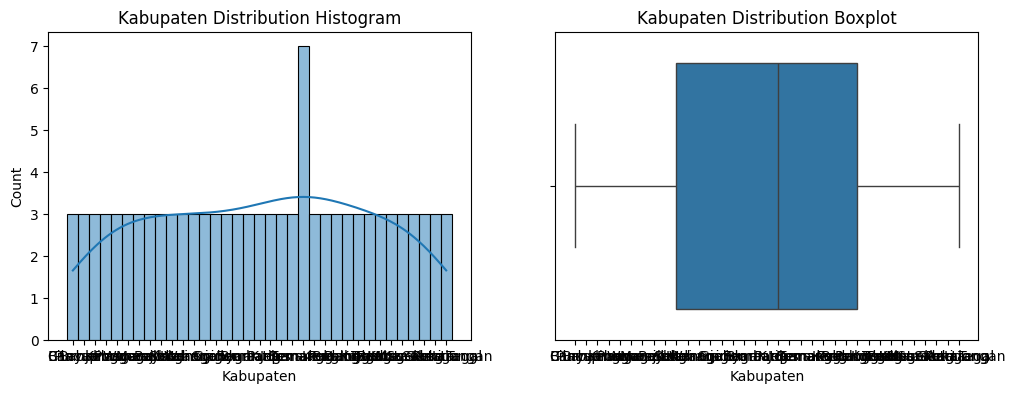

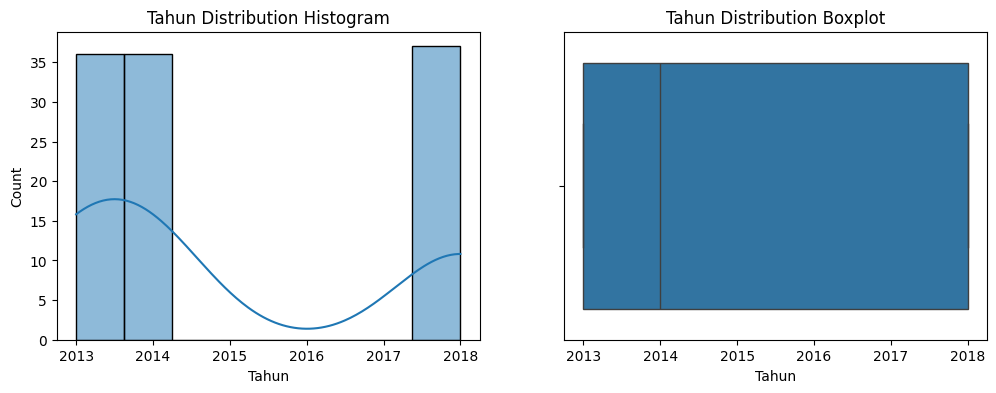

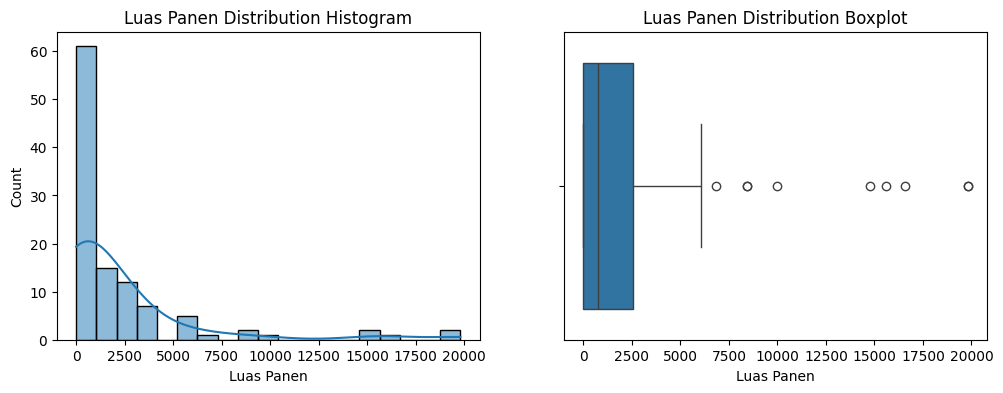

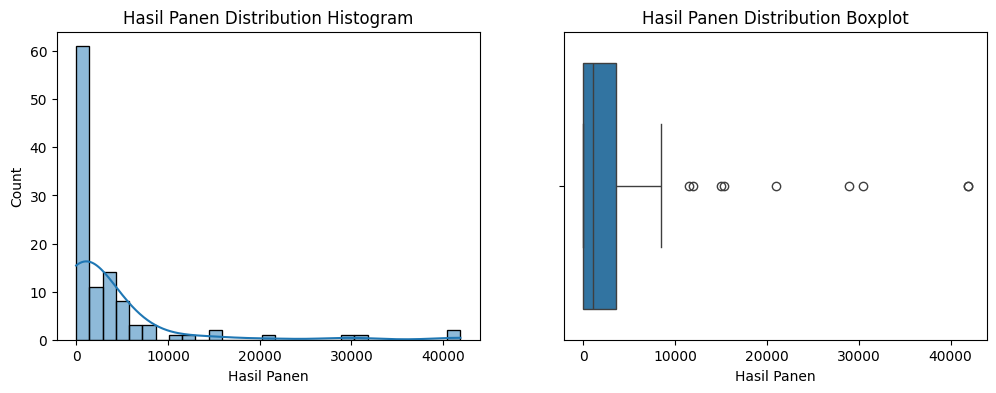

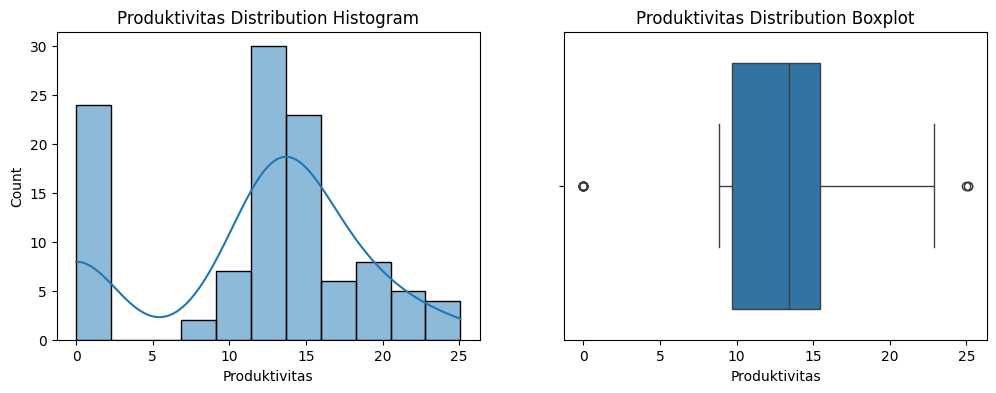

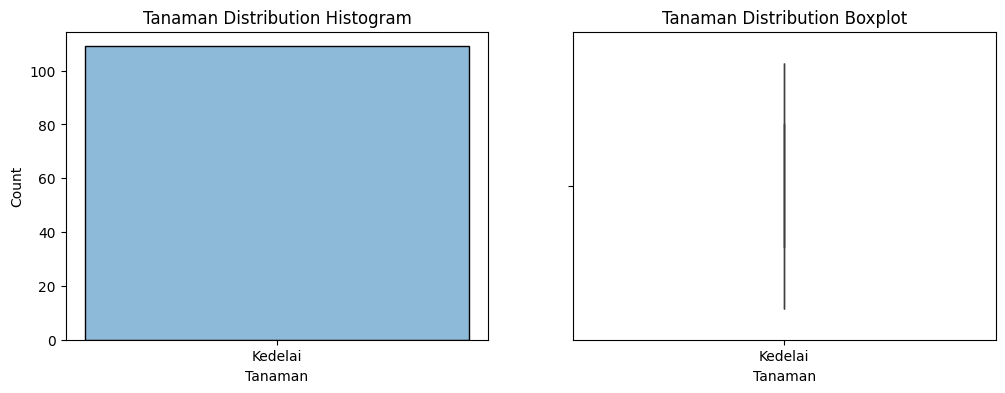

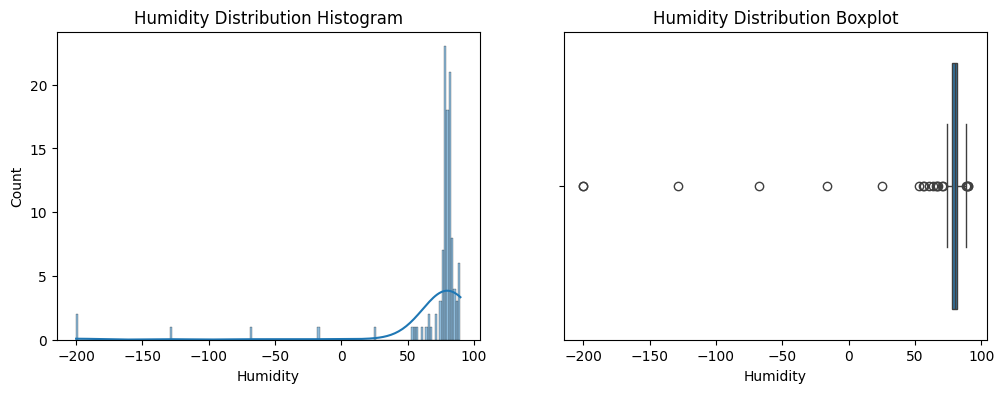

In [176]:
df_var = df.columns
for var in df_var:
    num_dist(df, var)

In [177]:
numerical_columns = ['Luas Panen', 'Hasil Panen', 'Produktivitas', 'Humidity']


description = df[numerical_columns].describe().T

# Menambahkan percentiles ke deskripsi
description['25%'] = df[numerical_columns].quantile(0.25)
description['50%'] = df[numerical_columns].quantile(0.50)
description['75%'] = df[numerical_columns].quantile(0.75)

# Menyusun ulang kolom agar sesuai dengan format tabel di gambar
description = description[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
description

,count,mean,std,min,25%,50%,75%,max
Luas Panen,109.0,2193.798165,3918.155870,0.000000,5.000000,738.000000,2556.00,19804.000000
Hasil Panen,109.0,3582.586532,7348.179820,0.000000,7.000000,1026.115000,3564.00,41866.000000
Produktivitas,109.0,11.633054,6.999664,0.000000,9.723143,13.400000,15.46,25.080769
Humidity,109.0,69.444562,45.813427,-199.984069,77.778577,79.931859,82.00,89.741623


## 2.4 Encoding

In [178]:
encoder = LabelEncoder()
df['Tanaman'] = encoder.fit_transform(df['Tanaman'])
df['Kabupaten'] = encoder.fit_transform(df['Kabupaten'])

<ipython-input-178-d457133ed473>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanaman'] = encoder.fit_transform(df['Tanaman'])
<ipython-input-178-d457133ed473>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kabupaten'] = encoder.fit_transform(df['Kabupaten'])


# 3 Visualisasi Data

## 2.5 Correlation

In [179]:
df.corr()

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Humidity
Kabupaten,1.000000,0.013277,-0.097347,-0.137651,0.007530,NaN,0.010717
Tahun,0.013277,1.000000,0.102350,0.100836,0.070910,NaN,-0.289637
Luas Panen,-0.097347,0.102350,1.000000,0.978483,0.360517,NaN,0.148480
Hasil Panen,-0.137651,0.100836,0.978483,1.000000,0.370342,NaN,0.129335
Produktivitas,0.007530,0.070910,0.360517,0.370342,1.000000,NaN,0.329481
Tanaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Humidity,0.010717,-0.289637,0.148480,0.129335,0.329481,NaN,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

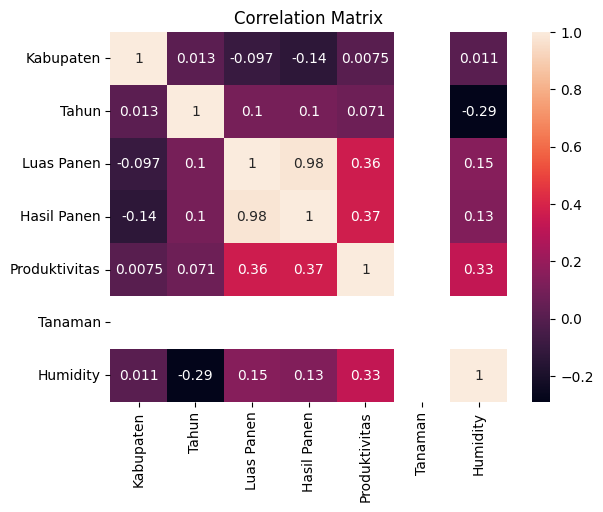

In [180]:
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

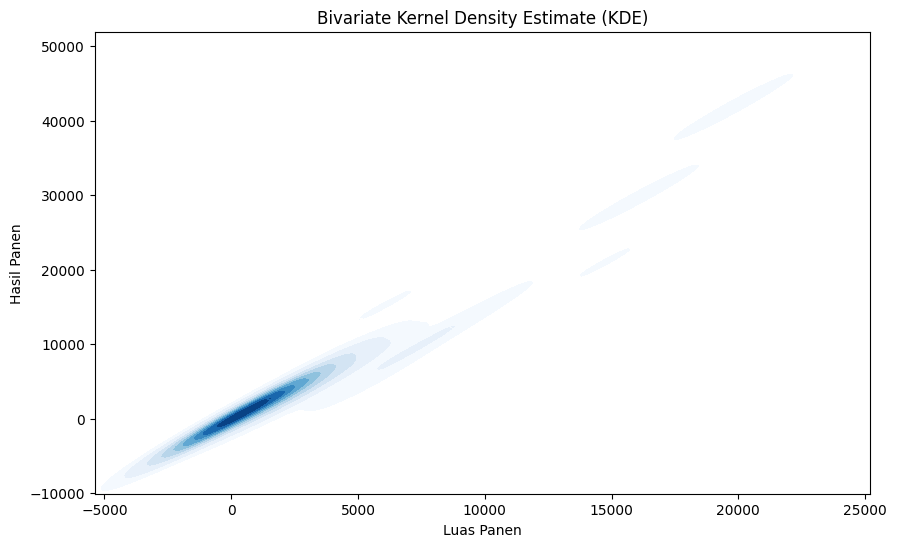

<ipython-input-181-319445b5bdc3>:9: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[v], y=y, cmap="Blues", fill=True)


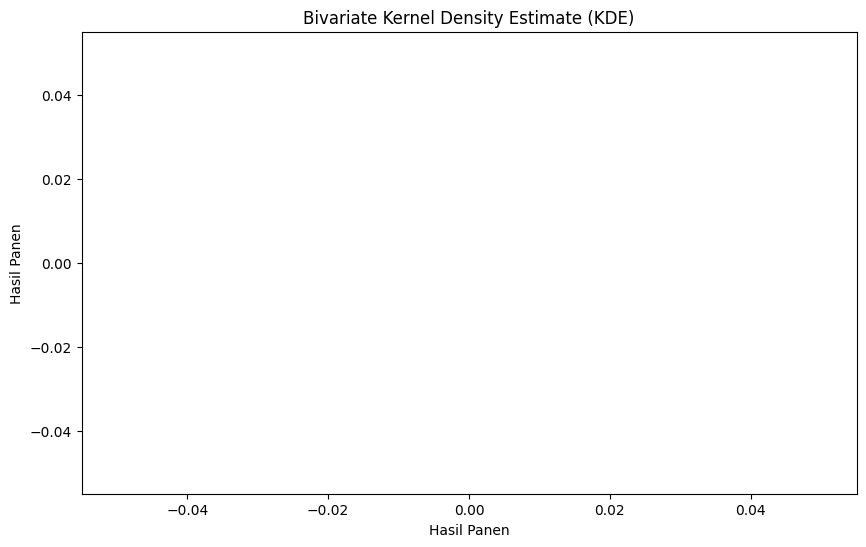

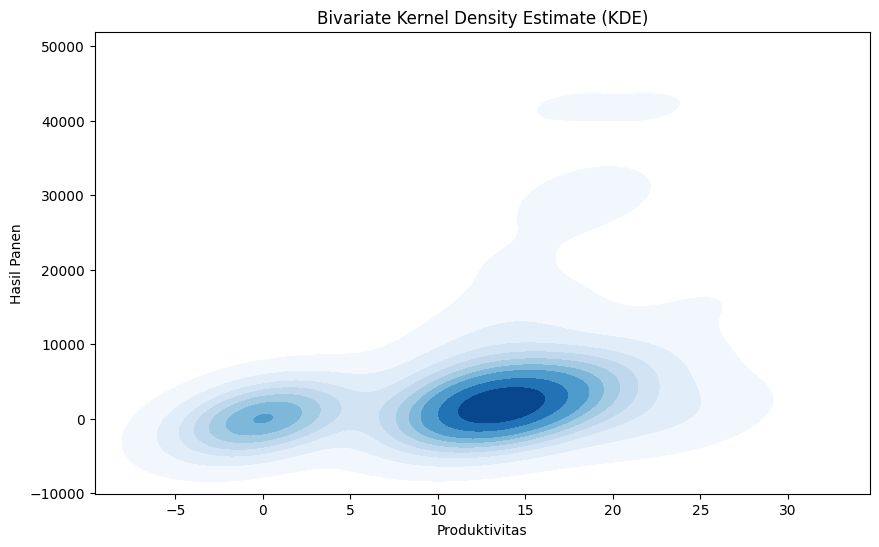

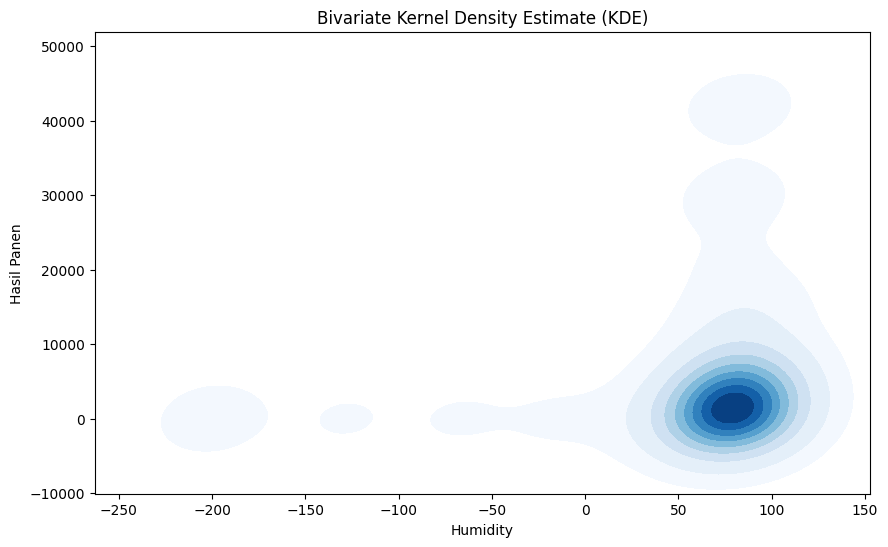

In [181]:
# Mengambil kolom yang relevan untuk plot KDE
y = df['Hasil Panen']

# Menghilangkan nilai NaN

# Membuat plot Bivariate KDE menggunakan Seaborn
for v in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(x=df[v], y=y, cmap="Blues", fill=True)
  plt.title('Bivariate Kernel Density Estimate (KDE)')
  plt.xlabel(v)
  plt.ylabel('Hasil Panen')
  plt.show()

# 3. Modelling

In [182]:
from sklearn.model_selection import train_test_split

x = df.drop(["Hasil Panen", "Kabupaten", "Tahun", "Tanaman"], axis=1)
y = df["Hasil Panen"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (87, 3)
x_test : (22, 3)
y_train : (87,)
y_test : (22,)


## 3.1 Random Forest Regression

In [183]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 11)
rf_model.fit(x_train,y_train)
rf_predict = rf_model.predict(x_test)

In [184]:
rf_model.score(x_test,y_test)

0.696539117604364

In [185]:
feature_importance = pd.Series(rf_model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=False)

Luas Panen       0.954157
Humidity         0.030537
Produktivitas    0.015306
dtype: float64

In [186]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = x.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances DataFrame
feature_importance_df

,Feature,Importance
0,Luas Panen,0.954157
2,Humidity,0.030537
1,Produktivitas,0.015306


<ipython-input-187-a41d033a7b79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


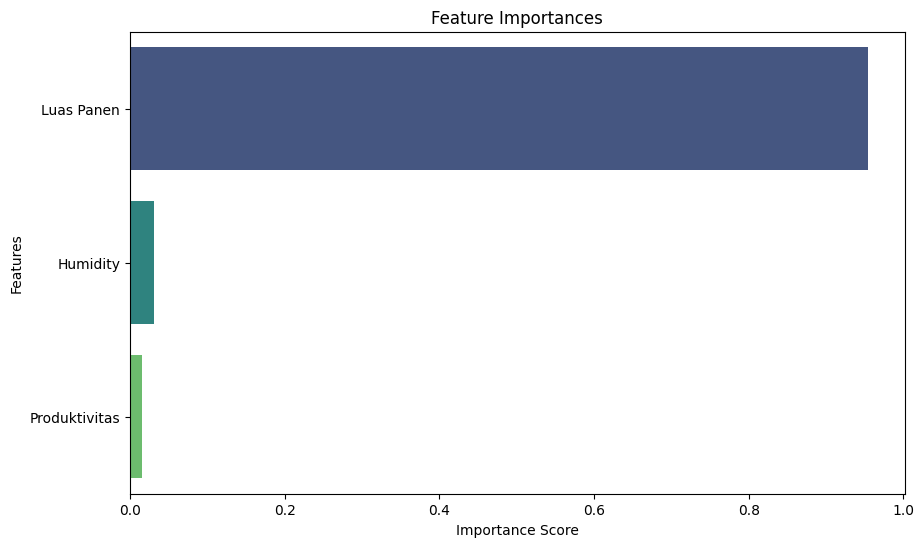

In [187]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [188]:
# K Fold RF
kf_rf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_r2_scores = []

rf_model_kf = RandomForestRegressor(n_estimators = 11)

for train_index, test_index in kf_rf.split(x):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Melatih model
    rf_model_kf.fit(x_train_fold, y_train_fold)

    # Memprediksi hasil pada data uji
    y_pred_fold = rf_model_kf.predict(x_test_fold)

    # Menghitung skor R-squared
    r2 = r2_score(y_test_fold, y_pred_fold)
    rf_r2_scores.append(r2)

rf_r2_scores.append(np.mean(rf_r2_scores))
rf_r2_scores.append(np.std(rf_r2_scores))
# Menampilkan skor untuk setiap fold, rata-rata skor, dan standar deviasi
print("Skor untuk setiap fold: ", rf_r2_scores)
print("Rata-rata skor R-squared: ", np.mean(rf_r2_scores))
print("Standar deviasi skor R-squared: ", np.std(rf_r2_scores))

Skor untuk setiap fold:  [0.8570562358229299, 0.9257352895610808, 0.9702862530433992, 0.9586915817048467, 0.929880018826309, 0.9283298757917132, 0.035988973666890994]
Rata-rata skor R-squared:  0.8008526040595958
Standar deviasi skor R-squared:  0.3140269186142828


In [189]:
# Evaluation
y_pred = rf_model.predict(x_test)

print("R-Squared : ", r2_score(y_test, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE : ", mean_absolute_error(y_test, y_pred))

R-Squared :  0.696539117604364
RMSE :  7107.492018243038
MAE :  2930.5823140495863


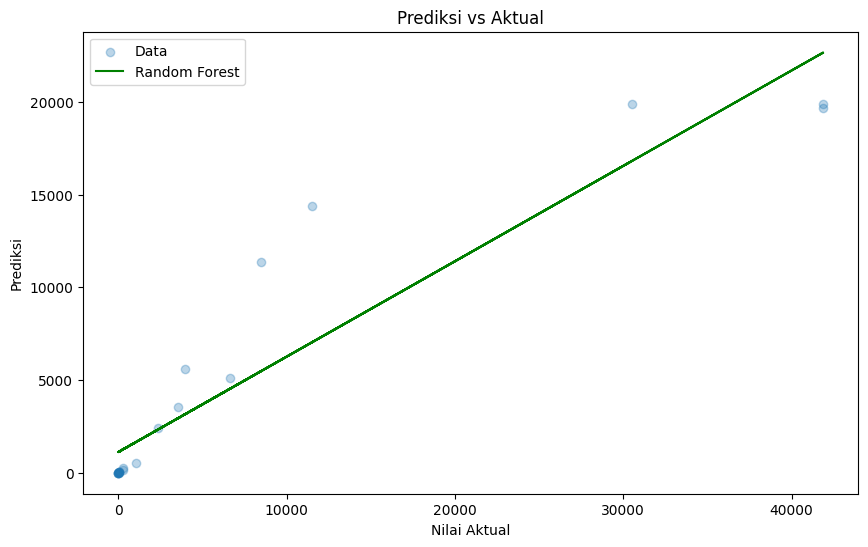

In [190]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Data')

# Menghitung garis regresi linear
coef = np.polyfit(y_test, y_pred, 1)
poly1d_fn = np.poly1d(coef)

# Menambahkan garis regresi linear pada plot
plt.plot(y_test, poly1d_fn(y_test), color='green', label='Random Forest')

plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Aktual')
plt.legend()
plt.show()

## 3.2 Linear Regression

In [191]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
lr_model = LinearRegression()

# Melatih model
lr_model.fit(x_train, y_train)

# Memprediksi hasil pada data uji
lr_predict = lr_model.predict(x_test)

         Feature  Importance
1  Produktivitas   46.469316
0     Luas Panen    1.551685
2       Humidity   -2.952495


<ipython-input-192-ef424c06075b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


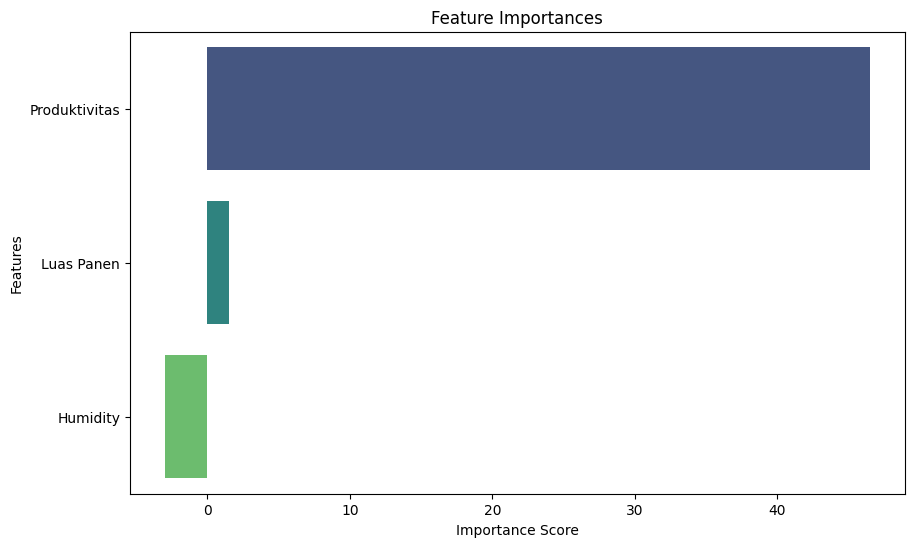

In [192]:
# Mengambil pentingnya fitur
feature_importances = lr_model.coef_
features = x.columns

# Membuat DataFrame untuk visualisasi yang lebih baik
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan DataFrame pentingnya fitur
print(feature_importance_df)

# Plot pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [193]:
import shap
# Mengambil pentingnya fitur menggunakan SHAP
explainer = shap.Explainer(lr_model, x_train)
shap_values = explainer(x_test)

# Plot SHAP summary
# shap.summary_plot(shap_values, x_test)

# Mengambil nilai SHAP untuk data uji dalam bentuk DataFrame
shap_values_df = pd.DataFrame(shap_values.values, columns=features)

shap_values_df
# # Mengambil koefisien dari model Linear Regression
# feature_importances = lr_model.coef_
# features = x.columns

# # Membuat DataFrame untuk visualisasi yang lebih baik
# feature_importance_df = pd.DataFrame({
#     'Feature': features,
#     'Importance': feature_importances
# })

# # Sort the DataFrame by importance
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Menampilkan DataFrame pentingnya fitur
# print(feature_importance_df)

# # Plot pentingnya fitur
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
# plt.title('Feature Importances')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.show()

# # Membuat plot Bivariate KDE menggunakan Seaborn
# plt.figure(figsize=(10, 6))
# sns.kdeplot(x=x['Luas Panen'], y=y, cmap="Blues", fill=True)
# plt.title('Bivariate Kernel Density Estimate (KDE)')
# plt.xlabel('Luas Panen (ha)')
# plt.ylabel('Hasil Panen (kg)')
# plt.show()

,Luas Panen,Produktivitas,Humidity
0,27923.171439,275.866110,-35.264398
1,16.123252,402.684169,-33.577331
2,1726.079721,554.541373,-31.081736
3,-2803.287733,465.925612,-32.157601
4,-2728.806870,60.248485,-31.961959
5,-2645.015900,668.102882,-28.592993
6,-2761.392247,74.669996,-40.402974
7,-2168.648716,662.783655,-17.402522
8,-2750.530455,80.694984,-31.545488
9,-2806.391102,-497.383306,-28.849171


In [194]:
# Evaluation
print("R-Squared : ", r2_score(y_test, lr_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, lr_predict)))
print("MAE : ", mean_absolute_error(y_test, lr_predict))

# Mengambil koefisien sebagai feature importance
lr_importance = lr_model.coef_

# Membuat dataframe untuk feature importance
lr_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': lr_importance
})

lr_importance_df

R-Squared :  0.9269615350009367
RMSE :  3486.910828061588
MAE :  1661.5464608677767


,Feature,Importance
0,Luas Panen,1.551685
1,Produktivitas,46.469316
2,Humidity,-2.952495


In [195]:
# K Fold LR
kf_lr = KFold(n_splits=5, shuffle=True, random_state=42)

lr_r2_scores = []

lr_model_kf = LinearRegression()

for train_index, test_index in kf_lr.split(x):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Melatih model
    lr_model_kf.fit(x_train_fold, y_train_fold)

    # Memprediksi hasil pada data uji
    y_pred_fold = lr_model_kf.predict(x_test_fold)

    # Menghitung skor R-squared
    r2 = r2_score(y_test_fold, y_pred_fold)
    lr_r2_scores.append(r2)

lr_r2_scores.append(np.mean(lr_r2_scores))
lr_r2_scores.append(np.std(lr_r2_scores))
# Menampilkan skor untuk setiap fold, rata-rata skor, dan standar deviasi
print("Skor untuk setiap fold: ", lr_r2_scores)
print("Rata-rata skor R-squared: ", np.mean(lr_r2_scores))
print("Standar deviasi skor R-squared: ", np.std(lr_r2_scores))

Skor untuk setiap fold:  [0.9557520617285239, 0.8037128867387998, 0.854853657245812, 0.9635325594158408, 0.9485473783304059, 0.9052797086918764, 0.05869632336663357]
Rata-rata skor R-squared:  0.7843392250739845
Standar deviasi skor R-squared:  0.30118546126104623


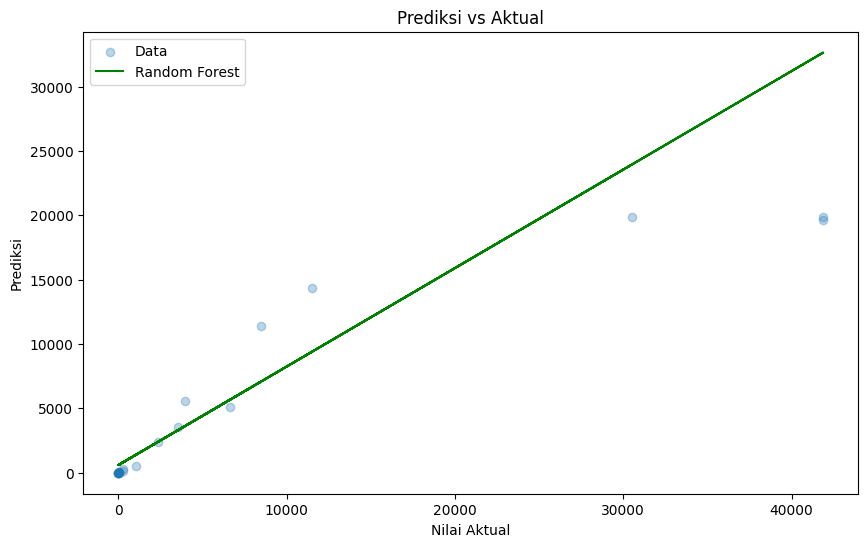

In [196]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Data')

# Menghitung garis regresi linear
coef = np.polyfit(y_test, lr_predict, 1)
poly1d_fn = np.poly1d(coef)

# Menambahkan garis regresi linear pada plot
plt.plot(y_test, poly1d_fn(y_test), color='green', label='Random Forest')

plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Aktual')
plt.legend()
plt.show()

## 3.3 Support Vector Machine

In [197]:
from sklearn.svm import LinearSVR

In [198]:
{'C': 0.5, 'dual': True, 'epsilon': 0.005, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 200000, 'tol': 0.0001}

{'C': 0.5,
 'dual': True,
 'epsilon': 0.005,
 'fit_intercept': True,
 'loss': 'squared_epsilon_insensitive',
 'max_iter': 200000,
 'tol': 0.0001}

In [199]:
from sklearn.svm import SVR

# Inisialisasi model SVR
# svr_model = SVR(C= 1000, degree=3, gamma='auto', kernel='linear')  # Anda bisa menggunakan kernel lain seperti 'linear', 'poly', dll.

# {'C': 1, 'dual': True, 'epsilon': 0.005, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 200000, 'tol': 1e-05}
svr_model = LinearSVR(C=0.0001, dual=True, epsilon=0.005, fit_intercept=False, loss='squared_epsilon_insensitive', max_iter=2000000, tol=1e-7) # Anda bisa menggunakan kernel lain seperti 'linear', 'poly', dll.

# Melatih model
svr_model.fit(x_train, y_train)  # Menggunakan y_train.ravel() untuk mengubah bentuk jika diperlukan

# Memprediksi hasil pada data uji
svr_predict = svr_model.predict(x_test)

In [200]:
# K Fold SVR
kf_svr = KFold(n_splits=5, shuffle=True, random_state=42)

svr_r2_scores = []

# svr_model_kf = SVR(C= 1000, degree=3, gamma='auto', kernel='linear')  # Anda bisa menggunakan kernel lain seperti 'linear', 'poly', dll.
# {'C': 1, 'dual': True, 'epsilon': 0.005, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 200000, 'tol': 1e-05}
svr_model_kf = LinearSVR(C=0.001, dual=True, epsilon=0.005, fit_intercept=False, loss='squared_epsilon_insensitive', max_iter=200000, tol=1e-6)  # Anda bisa menggunakan kernel lain seperti 'linear', 'poly', dll.

for train_index, test_index in kf_svr.split(x):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Melatih model
    svr_model_kf.fit(x_train_fold, y_train_fold)

    # Memprediksi hasil pada data uji
    y_pred_fold = svr_model_kf.predict(x_test_fold)

    # Menghitung skor R-squared
    r2 = r2_score(y_test_fold, y_pred_fold)
    svr_r2_scores.append(r2)

svr_r2_scores.append(np.mean(svr_r2_scores))
svr_r2_scores.append(np.std(svr_r2_scores))
# Menampilkan skor untuk setiap fold, rata-rata skor, dan standar deviasi
print("Skor untuk setiap fold: ", svr_r2_scores)
print("Rata-rata skor R-squared: ", np.mean(svr_r2_scores))
print("Standar deviasi skor R-squared: ", np.std(svr_r2_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Skor untuk setiap fold:  [0.9740420296511794, 0.8646984105031477, 0.9262357042411143, 0.9467418210149928, 0.9245646621457785, 0.9272565255112426, 0.03288962880176266]
Rata-rata skor R-squared:  0.7994898259813168
Standar deviasi skor R-squared:  0.31444104727156263


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [201]:
# Evaluation
print("R-Squared : ", r2_score(y_test, svr_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, svr_predict)))
print("MAE : ", mean_absolute_error(y_test, svr_predict))

R-Squared :  0.9284888954668181
RMSE :  3450.259541032837
MAE :  1591.3892219876946


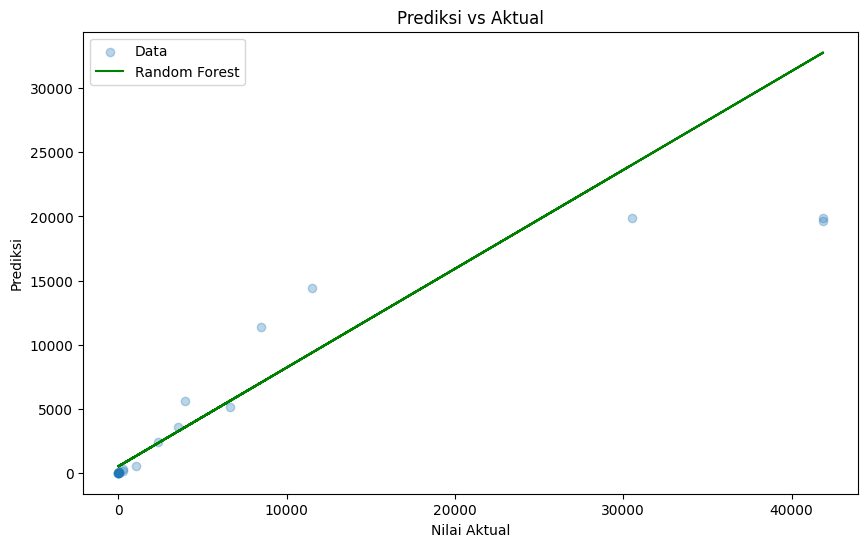

In [202]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Data')

# Menghitung garis regresi linear
coef = np.polyfit(y_test, svr_predict, 1)
poly1d_fn = np.poly1d(coef)

# Menambahkan garis regresi linear pada plot
plt.plot(y_test, poly1d_fn(y_test), color='green', label='Random Forest')

plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Aktual')
plt.legend()
plt.show()

## 3.4 Lasso Regression

In [203]:
from sklearn.linear_model import Lasso

# Inisialisasi model Lasso Regression
lasso_model = Lasso(alpha=0.0001)  # Anda bisa mengatur nilai alpha sesuai kebutuhan

# Melatih model
lasso_model.fit(x_train, y_train)

# Memprediksi hasil pada data uji
lasso_predict = lasso_model.predict(x_test)

         Feature  Importance
1  Produktivitas   46.469313
0     Luas Panen    1.551685
2       Humidity   -2.952495


<ipython-input-204-b8abb69efd80>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


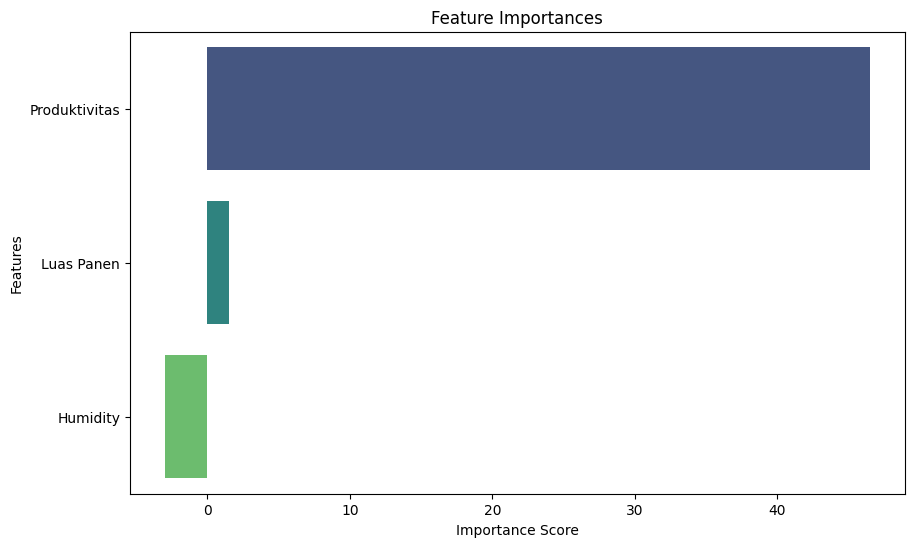

In [204]:
feature_importances = lasso_model.coef_
features = x.columns

# Membuat DataFrame untuk visualisasi yang lebih baik
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan DataFrame pentingnya fitur
print(feature_importance_df)

# Plot pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [205]:
# Evaluation

print("R-Squared : ", r2_score(y_test, lasso_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, lasso_predict)))
print("MAE : ", mean_absolute_error(y_test, lasso_predict))

R-Squared :  0.9269615353047204
RMSE :  3486.9108208101575
MAE :  1661.5464487174927


In [206]:
# K Fold Lasso
kf_lasso = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_r2_scores = []

lasso_model_kf = Lasso(alpha=0.0001)

for train_index, test_index in kf_lasso.split(x):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Melatih model
    lasso_model_kf.fit(x_train_fold, y_train_fold)

    # Memprediksi hasil pada data uji
    y_pred_fold = lasso_model_kf.predict(x_test_fold)

    # Menghitung skor R-squared
    r2 = r2_score(y_test_fold, y_pred_fold)
    lasso_r2_scores.append(r2)

lasso_r2_scores.append(np.mean(lasso_r2_scores))
lasso_r2_scores.append(np.std(lasso_r2_scores))
# Menampilkan skor untuk setiap fold, rata-rata skor, dan standar deviasi
print("Skor untuk setiap fold: ", lasso_r2_scores)
print("Rata-rata skor R-squared: ", np.mean(lasso_r2_scores))
print("Standar deviasi skor R-squared: ", np.std(lasso_r2_scores))

Skor untuk setiap fold:  [0.9557520617291423, 0.8037128865164457, 0.8548536603806547, 0.9635325594392381, 0.9485473781944133, 0.9052797092519788, 0.058696322969153114]
Rata-rata skor R-squared:  0.7843392254972894
Standar deviasi skor R-squared:  0.3011854615242345


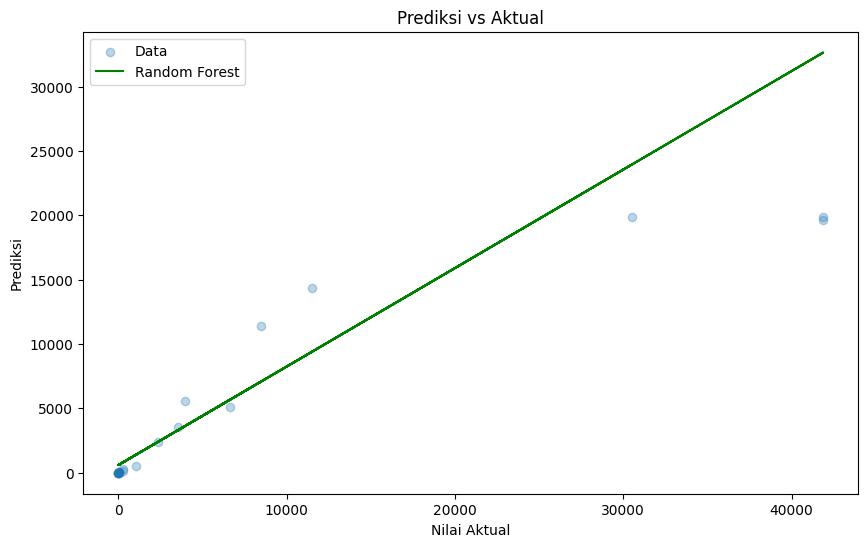

In [207]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Data')

# Menghitung garis regresi linear
coef = np.polyfit(y_test, lasso_predict, 1)
poly1d_fn = np.poly1d(coef)

# Menambahkan garis regresi linear pada plot
plt.plot(y_test, poly1d_fn(y_test), color='green', label='Random Forest')

plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Aktual')
plt.legend()
plt.show()

## 3.5 XGBoost Regression

In [208]:
import xgboost as xgb

# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=30,
    random_state=42
)

# Melatih model
xgb_model.fit(x_train, y_train)

# Memprediksi hasil pada data uji
xgb_predict = xgb_model.predict(x_test)

In [209]:
# Evaluation
print("R-Squared : ", r2_score(y_test, xgb_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, xgb_predict)))
print("MAE : ", mean_absolute_error(y_test, xgb_predict))

R-Squared :  0.9004460276192556
RMSE :  4070.9364180814578
MAE :  1650.0104896621706


In [210]:
# K Fold xgb
kf_xgb = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_r2_scores = []

xgb_model_kf = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=30,
    random_state=42
)

for train_index, test_index in kf_xgb.split(x):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Melatih model
    xgb_model_kf.fit(x_train_fold, y_train_fold)

    # Memprediksi hasil pada data uji
    y_pred_fold = xgb_model_kf.predict(x_test_fold)

    # Menghitung skor R-squared
    r2 = r2_score(y_test_fold, y_pred_fold)
    xgb_r2_scores.append(r2)

xgb_r2_scores.append(np.mean(xgb_r2_scores))
xgb_r2_scores.append(np.std(xgb_r2_scores))
# Menampilkan skor untuk setiap fold, rata-rata skor, dan standar deviasi
print("Skor untuk setiap fold: ", xgb_r2_scores)
print("Rata-rata skor R-squared: ", np.mean(xgb_r2_scores))
print("Standar deviasi skor R-squared: ", np.std(xgb_r2_scores))

Skor untuk setiap fold:  [0.9604168141647006, 0.9418896008325626, 0.973217628797867, 0.9965692509751413, 0.9428908882174469, 0.9629968365975436, 0.018654725397777447]
Rata-rata skor R-squared:  0.8280908207118627
Standar deviasi skor R-squared:  0.3309019241424429


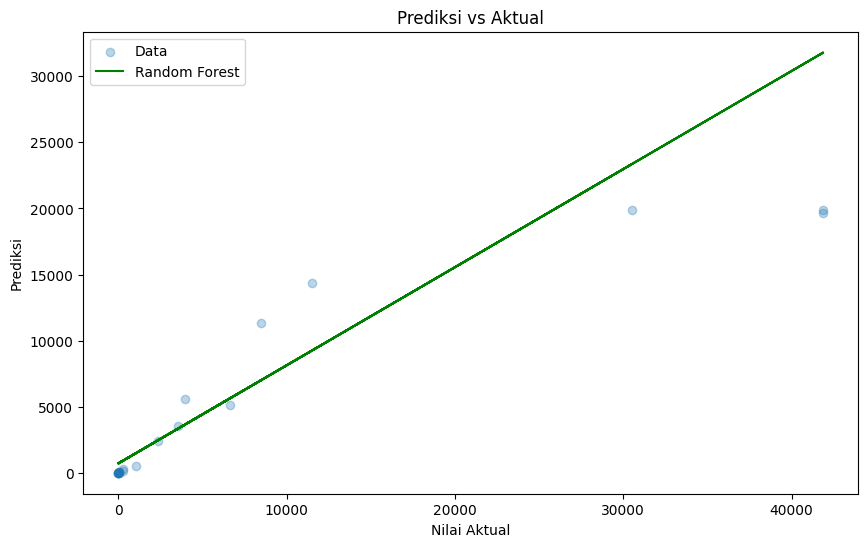

In [211]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Data')

# Menghitung garis regresi linear
coef = np.polyfit(y_test, xgb_predict, 1)
poly1d_fn = np.poly1d(coef)

# Menambahkan garis regresi linear pada plot
plt.plot(y_test, poly1d_fn(y_test), color='green', label='Random Forest')

plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Aktual')
plt.legend()
plt.show()

## Evaluasi

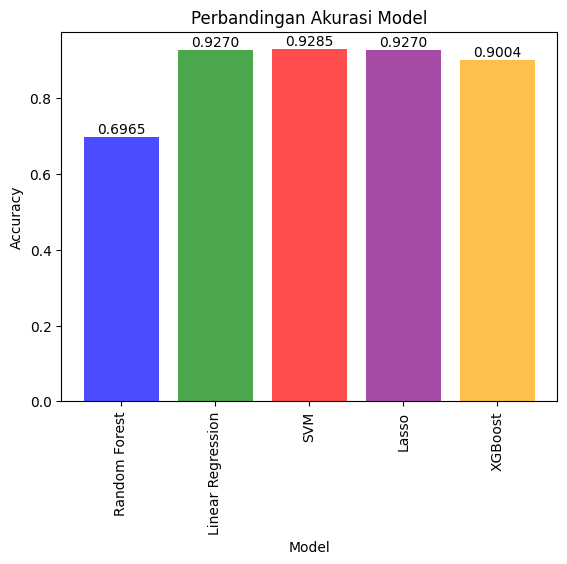

,Model,R-Squared
0,Random Forest,0.696539
1,Linear Regression,0.926962
2,SVM,0.928489
3,Lasso,0.926962
4,XGBoost,0.900446


In [212]:
# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Akurasi yang didapatkan dari masing-masing metode
accuracies = [
    r2_score(y_test, y_pred),
    r2_score(y_test, lr_predict),
    r2_score(y_test, svr_predict),
    r2_score(y_test, lasso_predict),
    r2_score(y_test, xgb_predict),
    # r2_score(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang
plt.bar(x_pos, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(accuracies)):
    plt.text(x_pos[i], accuracies[i] + 0.01, f'{accuracies[i]:.4f}', ha='center')

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.xticks(x_pos, model_names, rotation=90)  # Menetapkan nama model sebagai label sumbu X

# Menampilkan plot
plt.show()

r_sq_df = pd.DataFrame({
    'Model': model_names,
    'R-Squared': accuracies
})
r_sq_df

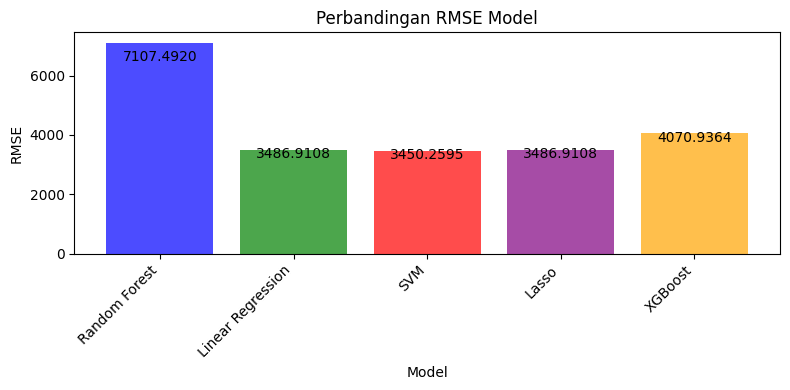

,Model,RMSE
0,Random Forest,7107.492018
1,Linear Regression,3486.910828
2,SVM,3450.259541
3,Lasso,3486.910821
4,XGBoost,4070.936418


In [213]:

# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Menghitung MSE untuk setiap model
rmses = [
    mean_squared_error(y_test, y_pred, squared=False),
    mean_squared_error(y_test, lr_predict, squared=False),
    mean_squared_error(y_test, svr_predict, squared=False),
    mean_squared_error(y_test, lasso_predict, squared=False),
    mean_squared_error(y_test, xgb_predict, squared=False),
    # mean_squared_error(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang dengan skala logaritmik pada sumbu y
plt.figure(figsize=(8, 4))  # Mengatur ukuran plot yang lebih sesuai
plt.bar(x_pos, rmses, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(rmses)):
    plt.text(x_pos[i], rmses[i] * 0.9, f'{rmses[i]:.4f}', ha='center', va='bottom')  # Menempatkan teks dengan lebih baik

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE Model')
plt.xticks(x_pos, model_names, rotation=45, ha='right')  # Mengubah rotasi dan perataan teks

# Menampilkan plot
plt.tight_layout()  # Menyempurnakan tata letak plot
plt.show()

rmae_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmses
})
rmae_df


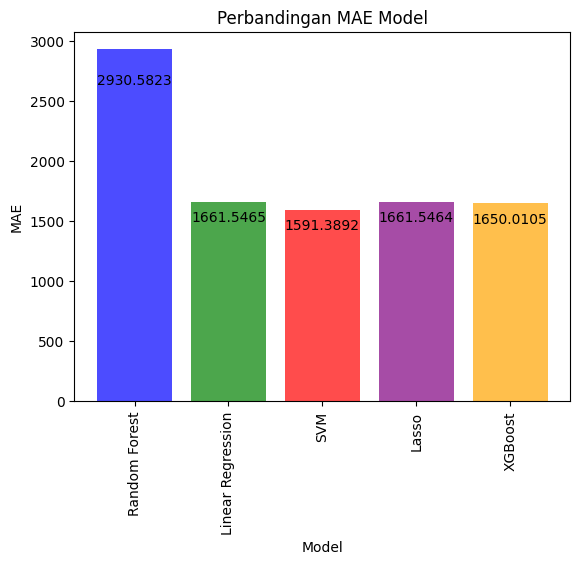

,Model,MAE
0,Random Forest,2930.582314
1,Linear Regression,1661.546461
2,SVM,1591.389222
3,Lasso,1661.546449
4,XGBoost,1650.010490


In [214]:
from sklearn.metrics import mean_absolute_error

# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Menghitung MAE untuk setiap model
maes = [
    mean_absolute_error(y_test, y_pred),
    mean_absolute_error(y_test, lr_predict),
    mean_absolute_error(y_test, svr_predict),
    mean_absolute_error(y_test, lasso_predict),
    mean_absolute_error(y_test, xgb_predict),
    # mean_absolute_error(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang
plt.bar(x_pos, maes, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(maes)):
    plt.text(x_pos[i], maes[i] * 0.9, f'{maes[i]:.4f}', ha='center')

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Perbandingan MAE Model')
plt.xticks(x_pos, model_names, rotation=90)  # Menetapkan nama model sebagai label sumbu X

# Menampilkan plot
plt.show()


# Membuat dataframe untuk perbandingan MAE
mae_df = pd.DataFrame({
    'Model': model_names,
    'MAE': maes
})
mae_df


In [215]:
pd.DataFrame({
    'Humidity': x_test['Humidity'],  # Asumsikan X_test memiliki kolom 'Humidity'
    'Luas Panen': x_test['Luas Panen'],  # Asumsikan X_test memiliki kolom 'Luas Panen'
    'Actual': y_test.ravel(),
    'Random Forest Prediction': y_pred.ravel(),
    'Linear Regression Prediction': lr_predict.ravel(),
    'SVM Prediction': svr_predict.ravel(),
    'Lasso Prediction': lasso_predict.ravel(),
    'XGBoost Prediction': xgb_predict.ravel(),
})

,Humidity,Luas Panen,Actual,Random Forest Prediction,Linear Regression Prediction,SVM Prediction,Lasso Prediction,XGBoost Prediction
487,80.259582,19804.0,41866.000,19874.878727,30900.815393,31132.076254,30900.815424,28792.507812
46,79.688178,1819.0,3523.234,3567.715182,3122.272332,2889.957223,3122.272307,3762.385986
56,78.842929,2921.0,6612.260,5136.929909,4986.581600,4668.731289,4986.581567,5139.894531
59,79.207320,2.0,4.146,6.780364,367.522521,52.364687,367.522487,25.839102
243,79.141057,50.0,60.000,42.283000,36.521898,11.725543,36.521891,41.533421
234,78.000000,104.0,260.840,134.986364,731.536232,274.174891,731.536184,314.684326
222,82.000000,29.0,35.700,36.801182,9.917017,-25.352710,9.917010,20.192646
236,74.209826,411.0,1026.115,543.911364,1213.774658,766.245373,1213.774610,419.782990
64,79.000000,36.0,44.784,37.365364,35.661282,-4.022363,35.661274,41.532860
246,78.086767,0.0,0.000,0.000000,-595.581337,-223.745113,-595.581306,0.204327


In [216]:
pd.DataFrame({
    'Fold': ["1", "2", "3", "4", "5", "Average", "Standard Deviation"],
    'Random Forest Prediction': rf_r2_scores,
    'Linear Regression Prediction': lr_r2_scores,
    'SVM Prediction': svr_r2_scores,
    'Lasso Prediction': lasso_r2_scores,
    'XGBoost Prediction': xgb_r2_scores,
})

,Fold,Random Forest Prediction,Linear Regression Prediction,SVM Prediction,Lasso Prediction,XGBoost Prediction
0,1,0.857056,0.955752,0.974042,0.955752,0.960417
1,2,0.925735,0.803713,0.864698,0.803713,0.941890
2,3,0.970286,0.854854,0.926236,0.854854,0.973218
3,4,0.958692,0.963533,0.946742,0.963533,0.996569
4,5,0.929880,0.948547,0.924565,0.948547,0.942891
5,Average,0.928330,0.905280,0.927257,0.905280,0.962997
6,Standard Deviation,0.035989,0.058696,0.032890,0.058696,0.018655


In [217]:
pd.DataFrame({
    'Fold': ["1", "2", "3", "4", "5", "Average", "Standard Deviation"],
    'Random Forest Prediction': rf_r2_scores,
    'Linear Regression Prediction': lr_r2_scores,
    'SVM Prediction': svr_r2_scores,
    'Lasso Prediction': lasso_r2_scores,
    'XGBoost Prediction': xgb_r2_scores,
})

,Fold,Random Forest Prediction,Linear Regression Prediction,SVM Prediction,Lasso Prediction,XGBoost Prediction
0,1,0.857056,0.955752,0.974042,0.955752,0.960417
1,2,0.925735,0.803713,0.864698,0.803713,0.941890
2,3,0.970286,0.854854,0.926236,0.854854,0.973218
3,4,0.958692,0.963533,0.946742,0.963533,0.996569
4,5,0.929880,0.948547,0.924565,0.948547,0.942891
5,Average,0.928330,0.905280,0.927257,0.905280,0.962997
6,Standard Deviation,0.035989,0.058696,0.032890,0.058696,0.018655


In [218]:
pd.DataFrame({
    'Model': ["Random Forest Regressor", "Linear Regression", "Support Vector Regressor", "Lasso Regressor", "XGBoost"],
    "MAE": [
    mean_absolute_error(y_test, y_pred),
    mean_absolute_error(y_test, lr_predict),
    mean_absolute_error(y_test, svr_predict),
    mean_absolute_error(y_test, lasso_predict),
    mean_absolute_error(y_test, xgb_predict),
    ],
    "RMSE": [
    mean_squared_error(y_test, y_pred, squared=False),
    mean_squared_error(y_test, lr_predict, squared=False),
    mean_squared_error(y_test, svr_predict, squared=False),
    mean_squared_error(y_test, lasso_predict, squared=False),
    mean_squared_error(y_test, xgb_predict, squared=False),
    ],
})

,Model,MAE,RMSE
0,Random Forest Regressor,2930.582314,7107.492018
1,Linear Regression,1661.546461,3486.910828
2,Support Vector Regressor,1591.389222,3450.259541
3,Lasso Regressor,1661.546449,3486.910821
4,XGBoost,1650.010490,4070.936418
